In [60]:
#Імпортуємо необхідні бібліотеки
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import datasets, layers, models

x_train original shape (50000, 32, 32, 3)
y_train original shape (50000, 1)


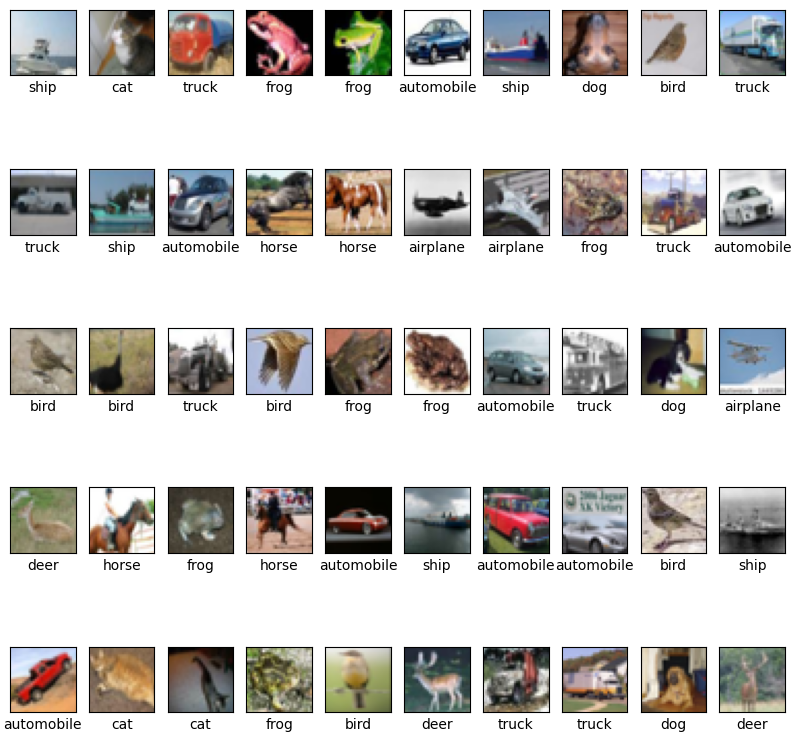

In [61]:
# Завантуємо та розділяємо датасет CIFAR-10
(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()

#Виводимо розмір
print("x_train original shape", train_x.shape)
print("y_train original shape", train_y.shape)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_y[i][0]])

In [62]:
#Нормалізація даних
train_x, test_x = train_x / 255.0, test_x / 255.0

In [64]:
#Побудова моделі
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Виведення структури моделі та інформації
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 3072)              0         
                                                                 
 dense_44 (Dense)            (None, 128)               393344    
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                                 
 dense_47 (Dense)            (None, 10)                330       
                                                                 
Total params: 404010 (1.54 MB)
Trainable params: 404010 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
#Тренування моделі
history = model.fit(train_x, train_y, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
1250/1250 [==============================] - 11s 8ms/step - loss: 1.9292 - accuracy: 0.3004 - val_loss: 1.8601 - val_accuracy: 0.3336
Epoch 2/3
1250/1250 [==============================] - 12s 9ms/step - loss: 1.7414 - accuracy: 0.3726 - val_loss: 1.7505 - val_accuracy: 0.3794
Epoch 3/3
1250/1250 [==============================] - 12s 9ms/step - loss: 1.6742 - accuracy: 0.3949 - val_loss: 1.6797 - val_accuracy: 0.4049


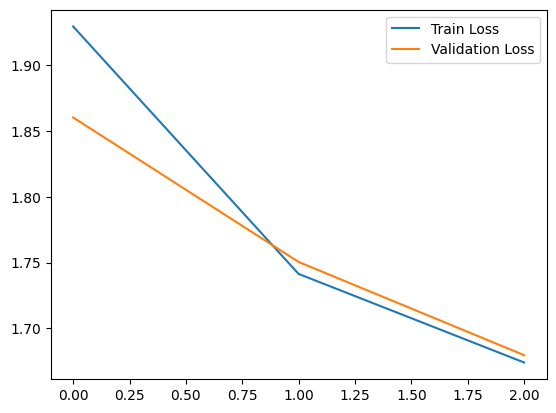

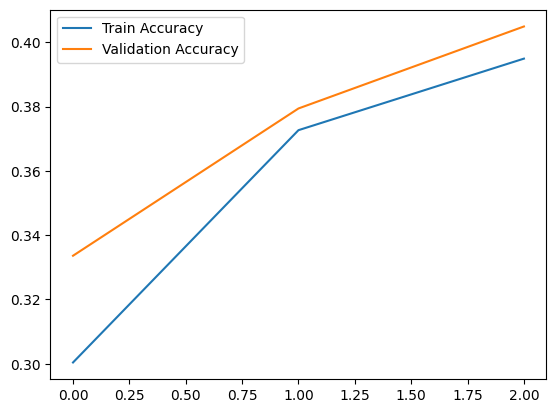

313/313 [==============================] - 1s 3ms/step - loss: 1.6506 - accuracy: 0.4087
Test accuracy: 0.40869998931884766


In [66]:
#Виведення графіків функції втрат та точності
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

#Оцінка точності на тестовому наборі
test_loss, test_acc = model.evaluate(test_x, test_y)
print(f'Test accuracy: {test_acc}')

In [67]:
# Оцінка точності на тестовому наборі
test_loss, test_acc = model.evaluate(test_x, test_y)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 1.6506 - accuracy: 0.4087
Test accuracy: 0.40869998931884766


313/313 [==============================] - 1s 2ms/step
Predicted: 9, Actual: [9]
Predicted: 8, Actual: [0]
Predicted: 7, Actual: [5]
Predicted: 6, Actual: [7]
Predicted: 8, Actual: [8]
Predicted: 8, Actual: [7]
Predicted: 3, Actual: [7]
Predicted: 3, Actual: [5]
Predicted: 1, Actual: [1]
Predicted: 4, Actual: [7]


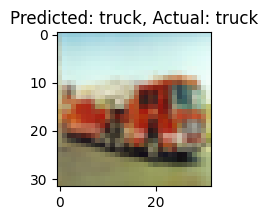

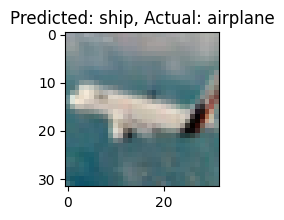

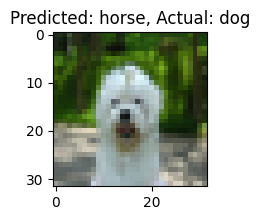

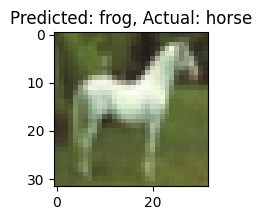

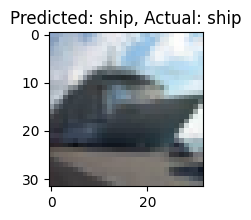

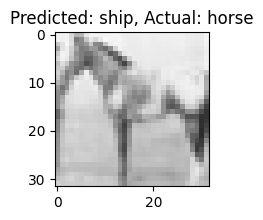

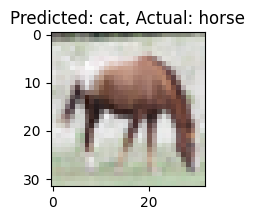

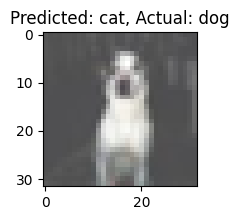

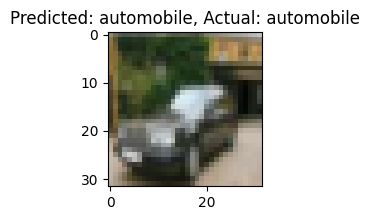

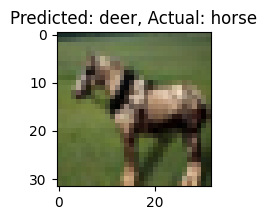

In [68]:
# Розпізнавання зображень
predictions = model.predict(test_x)
predicted_classes = np.argmax(predictions, axis=1)

#Вибірка 10 випадкових зображень для відображення результатів
random_indices = np.random.choice(test_x.shape[0], size=10, replace=False)

# Виведення спрогнозованих та справжніх класів
for i in random_indices:
   print(f"Predicted: {predicted_classes[i]}, Actual: {test_y[i]}")


# Виведення спрогнозованих та справжніх класів з назвами зображень
for i in random_indices:
    predicted_class = classes[predicted_classes[i]]
    actual_class = classes[int(test_y[i])]

    # Виведення самого зображення
    plt.figure(figsize=(2, 2))
    plt.imshow(test_x[i])
    plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
    plt.show()

In [69]:
#Статистика моделі
print("\nModel Statistics:")
print(f"Number of trainable parameters: {np.sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])}")
print(f"Number of layers in the model: {len(model.layers)}")


Model Statistics:
Number of trainable parameters: 404010
Number of layers in the model: 5


**Висновки:**
Отже, ми успішно навчили модель, яка має доволі високу точність на тестовому наборі. Спрогнозовані класи отриманих зображень у більшості випадків збігаються з справжніми класами. А Кількість навчальних параметрів у поданої моделі робить її здатною до швидкого тренування.

**Можливі шляхи поліпшення:**
Одним з варіантів поліпшення моделі є зміна гіперпараметрів моделі.
Другим рішенням є можливість використання більш складних архітектур моделі. якщо це звісно дозволяється.
Ну і третім варіантом є аугментація даних для покращення роботи моделі на прикладі реальних зображень.